# Room Simulation: Image Source Model for a Shoebox Room
*Fabian Brinkmann*<br>  
*Audio Communication Group, Technische Universität Berlin*<br>  
*Contact: fabian.brinkmann@tu-berlin.de*

In this assignment, you will code an image source model (ISM) to simulate the room impulse response (RIR) and binaural room impulse response (BRIR) for an omnidirectional source and frequency independent wall reflection coefficients. The image sources are distributed regularly for the special case of a shoebox room as illustrated by the image below.

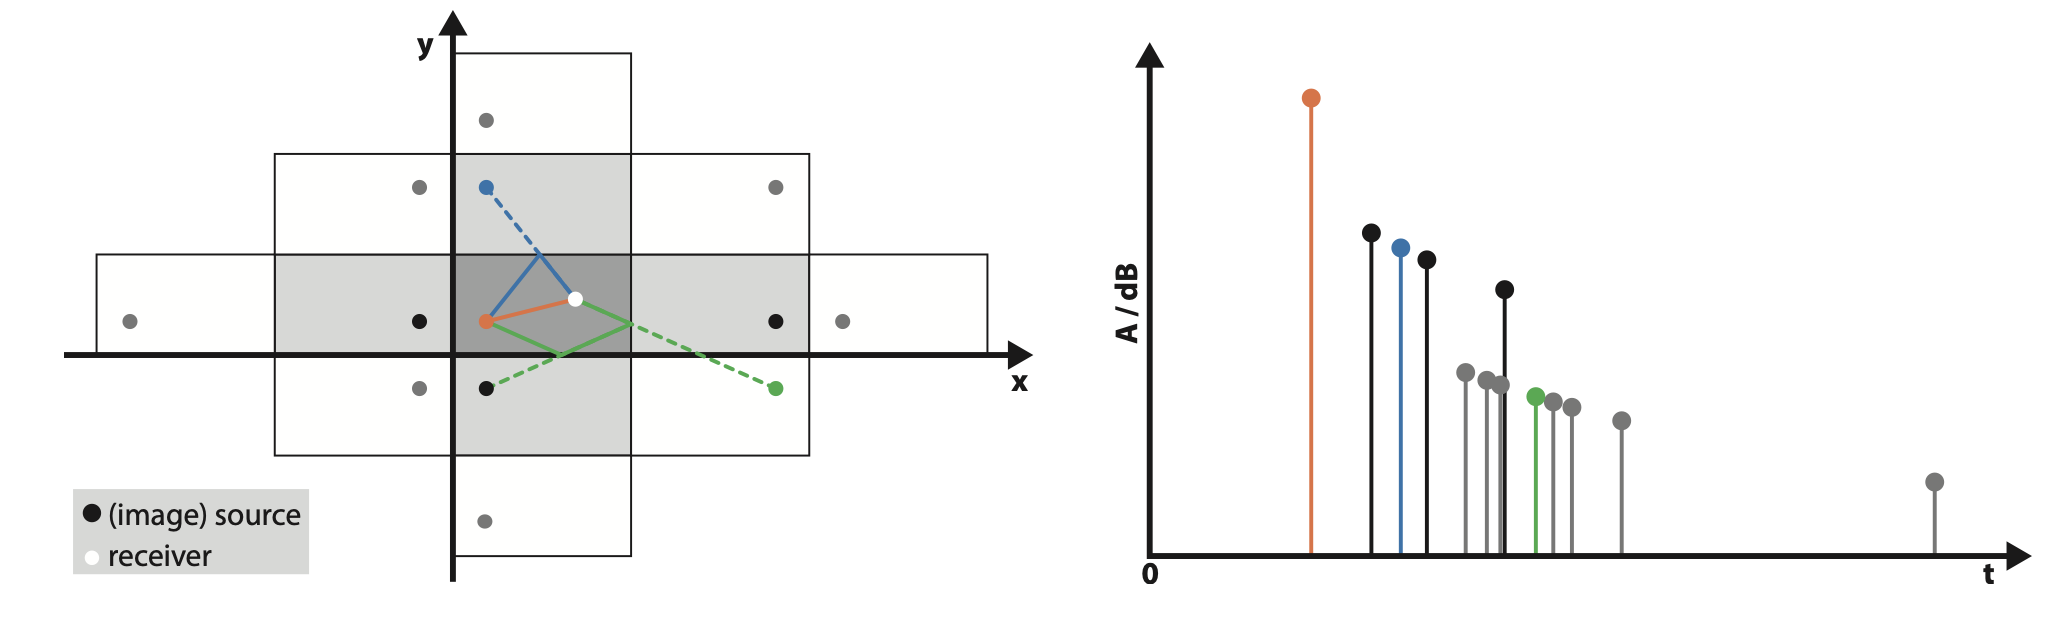

Due to this regularity, a closed analytical solution exists, which was derived by Allen and Berkley [1]. In this tutorial you will follow Brinkmann et al. [2], who added a slight extention to include source directivity into the model and corrected a sign error, that would cause errors in computing the BRIR.

**Duration:** 45-60 Minutes

**Requirements:** Basic knowledge of digital signal processing, HRTFs, coordinate conventions, and SOFA files

**References**<br>  
[1] J. B. Allen and D. A. Berkley, “Image method for efficiently simulating small-room acoustics,” J. Acoust. Soc. Am., vol. 65, no. 4, pp. 943–950, Apr. 1979.  
[2] F. Brinkmann, V. Erbes, and S. Weinzierl, “Extending the closed form image source model for source directivity,” in Fortschritte der Akustik – DAGA 2018, Munich, Germany, Mar. 2018, pp. 1298–1301. doi: [10.14279/depositonce-8681]( https://doi.org/10.14279/depositonce-8681)

**Dependencies**<br>  
`pip install pyfar>=0.7 nbgrader ipykernel watermark`

In [ ]:
import pyfar as pf
import numpy as np
import matplotlib.pyplot as plt
import pooch
from IPython.display import Audio, display
%matplotlib inline

# Download and read the required files

You will need HRIRs to simulate the BRIR. The following downloads HRTFs from the FABIAN HRTF database and an inverse diffuse field HRTF that can be used as a simple approximation for a headphone filter.

In [ ]:
# Path for saving the files. Adjust this to your needs. The default `None`will
# store the files in the system cache.
path = None

url = ("https://github.com/pyfar/files/raw/refs/heads/main/education/VAR_TUB/"
       "FABIAN_HRIR_measured_HATO_0.sofa")
checksum = "83ebbcd9a09d17679b95d201c9775438c0bb1199d565c3fc7a25448a905cdc3c"
filename_hrir = pooch.retrieve(url, checksum, path=path)

url = ("https://github.com/pyfar/files/raw/refs/heads/main/education/VAR_TUB/"
       "FABIAN_CTF_measured_inverted_smoothed.sofa")
checksum = "68d79bf54ba8e0d7732bf14c525ac20404e751bba26a3e674036c53b71f70bfb"
filename_hp_filter = pooch.retrieve(url, checksum, path=path)

Next, load the data that is stored in SOFA files as pyfar Signal objects. You also need to load the source positions for which the HRIRs were measured as a pyfar Coordinates object.

In [ ]:
# load HRIRs, the corresponding source positions, and the headphone filter
# YOUR CODE HERE
raise NotImplementedError()

### Step 1: Define the Scene

Start with the definition of the acoustic constants and the geometrical properties, i.e., the room dimensions and source/receiver position. You can change the parameters below, if you want.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Now, define the wall reflection coefficients $\beta$. A simple way to do this is to set a desired reverberation time $T$ and estimate wall-independent reflection coefficients from this. We can use Sabine's equation to calculate the equivalent absorption area $A$ that is required to realize the desired reverberation time based on the room volume $V$

$T = 0.161 \frac{V}{A}$

The equivalent absorption area $A$ can be used to compute the required absorption coefficient $\alpha$ based on the room's surface area $S$

$A = S\alpha$

In the last step the required reflection coefficient can be computed using

$\beta = \sqrt{1-\alpha}$

In [ ]:
# compute a single, wall independent reflection coefficient beta. Start by
# setting a reverberation time in seconds and follow the formulas above
# YOUR CODE HERE
raise NotImplementedError()

### Step 2: Compute the Impulse Responses

The impulse response is given by superposition of impulses (image sources) $\delta(t - \tau)$ that are delayed by $\tau$, weighted with an amplitude $A$, and convolved with the impulse response of the receiver $R$.

$h(t) = \sum_\mathbf{u=0}^1 \sum_\mathbf{l=-\infty}^\infty [A(\mathbf{u}, \mathbf{l}, t) \cdot \delta(t - \tau(\mathbf{u}, \mathbf{l}))] \ast R(\angle(\mathbf{u}, \mathbf{l}))$.

where $\angle = (\phi, \theta)$ denotes the azimuth angle $\phi$ and elevation $\theta$ with which the sound arrives at the receiver

$\phi = \text{arctan2} = \hat{p}_y / \hat{p}_x$ and $\theta = \text{arcsin} = \hat{p}_z / d$

with the relative source image source position $\hat{\mathbf{p}} = [\hat{p}_x, \hat{p}_y, \hat{p}_z^2]$ and the distance between the images source and receiver $d$ (see below).

The sums run over the vector-indices $\mathbf{u} = [u, v, w]$ and $\mathbf{l} = [l, m, n]$, which results in a total of six sums being involved in computing the impulse response.

**Compute the delay**

The delay $\tau$ can be computed as

$\tau(\mathbf{u}, \mathbf{l}) = d(\mathbf{u}, \mathbf{l}) / c$,

where $c$ is the speed of sound in m/s and $d$ the euclidean distance between the image source and the receiver that can be computed from the relative image source position $\hat{\mathbf{p}} = [\hat{p}_x, \hat{p}_y, \hat{p}_z^2]$

$d(\mathbf{u}, \mathbf{l}) = \sqrt{\hat{p}_x^2 + \hat{p}_y^2 + \hat{p}_z^2}$.

The relative image source position is given by

$\hat{\mathbf{p}} = (1-2 \mathbf{u})\mathbf{s} + 2 \mathbf{l} \, \mathbf{L} - \mathbf{r}$

with the source position $\mathbf{s} = [s_x, s_y, s_z]$, the receiver position $\mathbf{r} = [r_x, r_y, r_z]$ and the room size $\mathbf{L} = [L_x, L_y, L_z]$ in x, y, and z-direction.

**Compute the Amplitude**

The Amplitude $A$ of an image source is reduced every time it is reflected by a wall and due to the distance between the image source and the receiver. In our simplified special case of wall and frequency-independent reflection factors it is given by

$A(\mathbf{u}, \mathbf{l}, t) = \frac{\beta^{N_\text{reflections}}}{4 \pi d(\mathbf{u}, \mathbf{l})}$

with the number of reflections given by

$N_\text{reflections} = |l-u| + |l| + |m-v| + |m| + |n-w| + |n|$

**Indices up to the impulse response is computed**

Due to the sums $\sum_\mathbf{u=0}^1 \sum_\mathbf{l=-\infty}^\infty$, all image source inside a rectangular cuboid are computed. However, it makes more sense to compute all image sources inside a sphere to capture all reflections arriving up to a maximum time $t_\text{max}$ which defines the radius $r$ of the sphere

$r = c\, t_\text{max}$.

To approximate this, we can evaluate the sums over $\mathbf{l}$ up to

$|\mathbf{l}| \leq \text{ceiling}\frac{c\, t_\text{max}}{2 \mathbf{L}}$

where the ceiling operator denotes rounding up.


**Notes**
- start with with implementing the room impulse response first.
- check your results and intermediate results for plausibility. How can you do this?

In [ ]:
# Limit the loops for computing the impulse responses
# according to the desired reverberation time
# HINT: start with a small value for `duration_seconds` during testing)
duration_seconds = .5

# this makes sure the for loops below stop at roughly the correct indices.
# Can you figure how this formula was derived?
maximum_iteration = np.ceil(
    duration_seconds * speed_of_sound / (2 * room_dimensions)).astype(int)

# allocate arrays for the impulse responses
# (add a safety margin to the length)
duration_samples = int(duration_seconds * sampling_rate + 2**9)
rir = np.zeros((1, duration_samples), dtype=float)
brir = np.zeros((2, duration_samples), dtype=float)

# loop calculating image sources (direct sound and reflections) and adding them
# to the impulse responses. This can of course be speed optimized using vectors
# but this version is easier to code and understand.
for l in range(-maximum_iteration[0], maximum_iteration[0] + 1):
    for m in range(-maximum_iteration[1], maximum_iteration[1] + 1):
        for n in range(-maximum_iteration[2], maximum_iteration[2] + 1):
            for u in range(2):
                for v in range(2):
                    for w in range(2):

                        # vectorize the indices - you can use these if you want
                        lmn = np.array([l, m, n], dtype=float)
                        uvw = np.array([u, v, w], dtype=float)

                        # compute room impulse response -----------------------
                        # compute the relative image source position
                        # YOUR CODE HERE
                        raise NotImplementedError()

                        # compute distance between image source and receiver
                        # YOUR CODE HERE
                        raise NotImplementedError()

                        # avoid computing unwanted reflections
                        if distance > duration_seconds * speed_of_sound:
                            continue

                        # compute the image source delay in samples
                        # YOUR CODE HERE
                        raise NotImplementedError()

                        # compute the image source amplitude
                        # YOUR CODE HERE
                        raise NotImplementedError()

                        # add current image source to room impulse response
                        # YOUR CODE HERE
                        raise NotImplementedError()

                        # compute binaural room impulse response --------------
                        # compute direction of arrival in radians
                        # YOUR CODE HERE
                        raise NotImplementedError()

                        # find the HRIR that is closet to the
                        # direction of arrival
                        # YOUR CODE HERE
                        raise NotImplementedError()

                        # add HRIR to binaural room impulse response
                        # YOUR CODE HERE
                        raise NotImplementedError()

# convert impulse responses stored in numpy arrays to pyfar Signal objects
# YOUR CODE HERE
raise NotImplementedError()

# save normalized impulse responses as wav files for use in later assignments
# YOUR CODE HERE
raise NotImplementedError()

### Step 3: Plot

Inspect your results by plotting.

- Do you observe the expected decay according to the reverberation time you set in the impulse responses?
- Can you explain the look of the spectra?

In [ ]:
# plot the RIR in the time and frequency domain.
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# plot the RIR in the time and frequency domain.
# YOUR CODE HERE
raise NotImplementedError()

### Step 4: Listen

In [ ]:
# load an audio content you like
content = pf.signals.files.drums(sampling_rate)

# create a player to listen to the anechoic audio content
content_player = Audio(content.time, rate=sampling_rate)
display('Anechoic audio content')
display(content_player)

# convolve RIR with audio content and create a player for the result
# YOUR CODE HERE
raise NotImplementedError()

# convolve BRIR with audio content and inverse diffuse field transfer function
# used as a simple headphone filter. Also create a player for listening.
# YOUR CODE HERE
raise NotImplementedError()

# License notice

This notebook is licensed under CC BY 4.0

# Watermark

The following watermark might help others to install specific package versions that might be required to run the notebook.

In [ ]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pyfar,sofar,nbgrader,watermark